In [1]:
#1. Import libraries and the updated combined dataset with the new customers column.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path= r'/Users/katep/08-2023 Instacart Basket Analysis'
final_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cus_ords_prods.pkl'))

In [2]:
final_data.shape

(32433030, 35)

#2. There are PII data in the final_data dataframe. The PII data includes the following customer columns combined 
    together: 'First Name', 'Surname', 'Gender', 'STATE', 'Age', 'Num_Dependants', 'Marital_Status', 'income'. So when
    performing analysis, inform a senior colleague or whoever is responsible for data security for further 
    instructions on the PII data. Or avoid referencing the columns together, especially 'First Name','Surname', 
    together with another column or some other columns. 

#3. Create a “Region” column based on the “State” column from the customers data set.

In [3]:
#Creat Northeast region
final_data.loc[ (final_data['STATE']== 'Maine') | (final_data['STATE']=='New Hampshire') |
                (final_data['STATE']=='Vermont') | (final_data['STATE']=='Massachusetts') |
                (final_data['STATE']== 'Rhode Island' )|(final_data['STATE']=='Connecticut') |
                (final_data['STATE']== 'New York' )|(final_data['STATE']== 'Pennsylvania' )|
                (final_data['STATE']==  'New Jersey'), 'Region']= 'Northeast'


In [4]:
#Create Midwest region
final_data.loc[ (final_data['STATE']== 'Wisconsin') | (final_data['STATE']== 'Michigan') |
                (final_data['STATE']== 'Illinois') | (final_data['STATE']=='Indiana ') |
                (final_data['STATE']== 'Ohio') | (final_data['STATE']== 'North Dakota' ) |
                (final_data['STATE']== 'South Dakota' ) | (final_data['STATE']== 'Nebraska' )| 
                (final_data['STATE']==  'Kansas') | (final_data['STATE']==  'Minnesota')|
                (final_data['STATE']== 'Iowa')|(final_data['STATE']== 'Missouri'), 'Region']= 'Midwest'


In [5]:
#Create South region
final_data.loc[ (final_data['STATE']== 'Delaware' ) | (final_data['STATE']== 'Maryland') |
                (final_data['STATE']== 'District of Columbia' ) | (final_data['STATE']== 'Virginia' ) |
                (final_data['STATE']== 'West Virginia'  )|(final_data['STATE']== 'North Carolina') |
                (final_data['STATE']== 'South Carolina' )|(final_data['STATE']== 'Georgia'  )|
                (final_data['STATE']==  'Florida' )| (final_data['STATE']== 'Kentucky')|
                (final_data['STATE']==  'Tennessee')|(final_data['STATE']== 'Mississippi')|
                (final_data['STATE']==  'Alabama' )|(final_data['STATE']==  'Oklahoma' ) |
                (final_data['STATE']==  'Texas')|(final_data['STATE']== 'Arkansas' )|
                (final_data['STATE']==  'Louisiana'), 'Region']= 'South'


In [6]:
#Create West region
final_data.loc[ (final_data['STATE']== 'Idaho' ) | (final_data['STATE']== 'Montana') |
                (final_data['STATE']== 'Wyoming' ) | (final_data['STATE']== 'Nevada' ) |
                (final_data['STATE']== 'Utah'  )|(final_data['STATE']== 'Colorado') |
                (final_data['STATE']== 'Arizona' )|(final_data['STATE']== 'New Mexico'  )|
                (final_data['STATE']== 'Alaska' )| (final_data['STATE']== 'Washington')|
                (final_data['STATE']== 'Oregon')|(final_data['STATE']== 'California')|
                (final_data['STATE']== 'Hawaii'), 'Region']= 'West'


In [7]:
final_data['Region'].value_counts()

Region
South        10801195
West          8300141
Midwest       6975790
Northeast     5728144
Name: count, dtype: int64

In [8]:
final_data.loc[(final_data['Region']=='South' ),'South_Spending']= final_data['spending_flag']
final_data['South_Spending'].value_counts()


South_Spending
Low spender     10591015
High spender      210180
Name: count, dtype: int64

In [9]:
final_data.loc[(final_data['Region']=='West' ),'West_Spending']= final_data['spending_flag']
final_data['West_Spending'].value_counts() 

West_Spending
Low spender     8139334
High spender     160807
Name: count, dtype: int64

In [10]:
final_data.loc[(final_data['Region']=='Midwest' ),'Midwest_Spending']= final_data['spending_flag']
final_data['Midwest_Spending'].value_counts() 

Midwest_Spending
Low spender     6835490
High spender     140300
Name: count, dtype: int64

In [11]:
final_data.loc[(final_data['Region']=='Northeast' ),'Northeast_Spending']= final_data['spending_flag']
final_data['Northeast_Spending'].value_counts()

Northeast_Spending
Low spender     5619802
High spender     108342
Name: count, dtype: int64

#3.Spending habits in all regions are different.In general, lower spenders are a lot more than high spenders. South region has the most low spenders and also the most high spenders.

In [4]:
final_data['order_number'].value_counts()

order_number
1     2077979
3     2050645
2     2048244
4     1820215
5     1628332
       ...   
95      14526
96      13745
97      13366
98      12857
99      12434
Name: count, Length: 99, dtype: int64

In [12]:
#4. Create a exclusion_flag column.
final_data.loc[final_data['order_number'] <5 , 'exclusion_flag'] = 'x'

In [13]:
final_data['exclusion_flag'].value_counts()

exclusion_flag
x    7997083
Name: count, dtype: int64

In [17]:
low_activity_customer= final_data.loc[final_data['exclusion_flag']=='x']

In [18]:
low_activity_customer.shape

(7997083, 41)

In [10]:
#Export the newly created dataframe low_activity_customer
low_activity_customer.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [14]:
final_data2= final_data.loc[final_data['exclusion_flag']!='x']

In [15]:
final_data2.shape

(24435947, 41)

#5. Create a customer profiling variable based on age, income, certain goods in the “department_id” column, 
    number of dependents, or other variables.

In [18]:
final_data2.columns

Index(['user_id', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age',
       'date_joined', 'Num_Dependants', 'Marital_Status', 'income',
       'Unnamed: 0_x', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range',
       'busiest_day', 'Busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag', 'median_days_since',
       'order_frequency_flag', 'Region', 'South_Spending', 'West_Spending',
       'Midwest_Spending', 'Northeast_Spending', 'exclusion_flag',
       'customer_profile'],
      dtype='object')

In [19]:
 final_data2['income'].sort_values() 

5408843     25903
5408841     25903
5408839     25903
5408837     25903
5408836     25903
            ...  
3445094    593901
3445093    593901
3445092    593901
3445066    593901
3445583    593901
Name: income, Length: 24435947, dtype: int64

In [20]:
final_data2['department_id'].value_counts()

department_id
4     7227091
16    4132060
19    2187121
7     2036466
1     1628844
13    1385520
3      886698
15     787790
20     783011
9      633725
17     539349
14     529632
12     523891
18     335947
11     328524
6      197900
5      107972
8       72115
21      57567
10      27558
2       27166
Name: count, dtype: int64

In [22]:
# Select the largest numbers in the departments which have highest orders. They are department_id 4 and 16.

final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Num_Dependants'] >0) 
               & (final_data2['income']>= 100000) & (final_data2['department_id']==4), 
               'customer_profile']= 'HighIncome_OlderParent_ProduceShopper'


final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Num_Dependants'] >0) 
               & (final_data2['income']>= 100000) & (final_data2['department_id']==16), 
               'customer_profile']= 'HighIncome_OlderParent_DairyShopper'


final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Num_Dependants'] >0) 
               & (final_data2['income']>= 100000) & (final_data2['department_id']==4), 
               'customer_profile']= 'HighIncome_YoungParent_ProduceShopper'


final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Num_Dependants'] >0) 
               & (final_data2['income']>= 100000) & (final_data2['department_id']==16), 
               'customer_profile']= 'HighIncome_YoungParent_DairyShopper'


In [23]:
final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Num_Dependants'] >0) 
               & (final_data2['income']< 100000) & (final_data2['department_id']==4), 
               'customer_profile']= 'LowIncome_OlderParent_ProduceShopper'

final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Num_Dependants'] >0) 
               & (final_data2['income']< 100000) & (final_data2['department_id']==16), 
               'customer_profile']= 'LowIncome_OlderParent_DairyShopper'


final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Num_Dependants'] >0) 
               & (final_data2['income']< 100000) & (final_data2['department_id']==4), 
               'customer_profile']= 'LowIncome_YoungParent_ProduceShopper'


final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Num_Dependants'] >0) 
               & (final_data2['income']< 100000) & (final_data2['department_id']==16), 
               'customer_profile']= 'LowIncome_YoungParent_DairyShopper'



In [24]:
final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']>= 100000) & (final_data2['department_id']==4), 
               'customer_profile']= 'HighIncome_OlderSingle_ProduceShopper'

final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']>= 100000) & (final_data2['department_id']==16), 
               'customer_profile']= 'HighIncome_OlderSingle_DairyShopper'


final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']>= 100000) & (final_data2['department_id']==4), 
               'customer_profile']= 'HighIncome_YoungSingle_ProduceShopper'


final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']>= 100000) & (final_data2['department_id']==16), 
               'customer_profile']= 'HighIncome_YoungSingle_DairyShopper'


In [25]:
final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']< 100000) & (final_data2['department_id']==4), 
               'customer_profile']= 'LowIncome_OlderSingle_ProduceShopper'

final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']< 100000) & (final_data2['department_id']==16), 
               'customer_profile']= 'LowIncome_OlderSingle_DairyShopper'

final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']< 100000) & (final_data2['department_id']==4), 
               'customer_profile']= 'LowIncome_YoungSingle_ProduceShopper'


final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']< 100000) & (final_data2['department_id']==16), 
               'customer_profile']= 'LowIncome_YoungSingle_DairyShopper'



In [26]:
final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Num_Dependants'] >0)
               & (final_data2['income']>= 100000) & ((final_data2['department_id']!=16)&(final_data2['department_id']!=4))
               , 'customer_profile']= 'HighIncome_YoungParent_OtherItemsShopper'

final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Num_Dependants'] >0)
               & (final_data2['income']>= 100000) & ((final_data2['department_id']!=16)&(final_data2['department_id']!=4))
               , 'customer_profile']= 'HighIncome_OlderParent_OtherItemsShopper'

final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']>= 100000) & ((final_data2['department_id']!=16)&(final_data2['department_id']!=4))
               , 'customer_profile']= 'HighIncome_YoungSingle_OtherItemsShopper'


final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']>= 100000) & ((final_data2['department_id']!=16)&(final_data2['department_id']!=4))
               , 'customer_profile']= 'HighIncome_OlderSingle_OtherItemsShopper'


In [27]:
final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Num_Dependants'] >0)
               & (final_data2['income']< 100000) & ((final_data2['department_id']!=16)&(final_data2['department_id']!=4))
               , 'customer_profile']= 'LowIncome_YoungParent_OtherItemsShopper'

final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Num_Dependants'] >0)
               & (final_data2['income']< 100000) & ((final_data2['department_id']!=16)&(final_data2['department_id']!=4))
               , 'customer_profile']= 'LowIncome_OlderParent_OtherItemsShopper'


final_data2.loc[(final_data2['Age'] < 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']< 100000) & ((final_data2['department_id']!=16)&(final_data2['department_id']!=4))
               , 'customer_profile']= 'LowIncome_YoungSingle_OtherItemsShopper'


final_data2.loc[(final_data2['Age'] >= 40) & (final_data2['Marital_Status']!='married') 
               & (final_data2['income']< 100000) & ((final_data2['department_id']!=16)&(final_data2['department_id']!=4))
               , 'customer_profile']= 'LowIncome_OlderSingle_OtherItemsShopper'


In [28]:
final_data2['customer_profile'].value_counts()

customer_profile
HighIncome_OlderParent_OtherItemsShopper    4328386
LowIncome_YoungParent_OtherItemsShopper     2659337
HighIncome_OlderParent_ProduceShopper       2469032
LowIncome_OlderParent_OtherItemsShopper     2101953
LowIncome_YoungSingle_OtherItemsShopper     1684964
LowIncome_YoungParent_ProduceShopper        1484359
HighIncome_OlderSingle_OtherItemsShopper    1452956
HighIncome_OlderParent_DairyShopper         1403698
LowIncome_OlderParent_ProduceShopper        1073436
LowIncome_YoungSingle_ProduceShopper         936833
LowIncome_YoungParent_DairyShopper           848398
HighIncome_OlderSingle_ProduceShopper        835605
LowIncome_OlderSingle_OtherItemsShopper      694996
LowIncome_OlderParent_DairyShopper           616457
LowIncome_YoungSingle_DairyShopper           537222
HighIncome_OlderSingle_DairyShopper          470169
LowIncome_OlderSingle_ProduceShopper         355177
LowIncome_OlderSingle_DairyShopper           207905
HighIncome_YoungParent_OtherItemsShopper      9

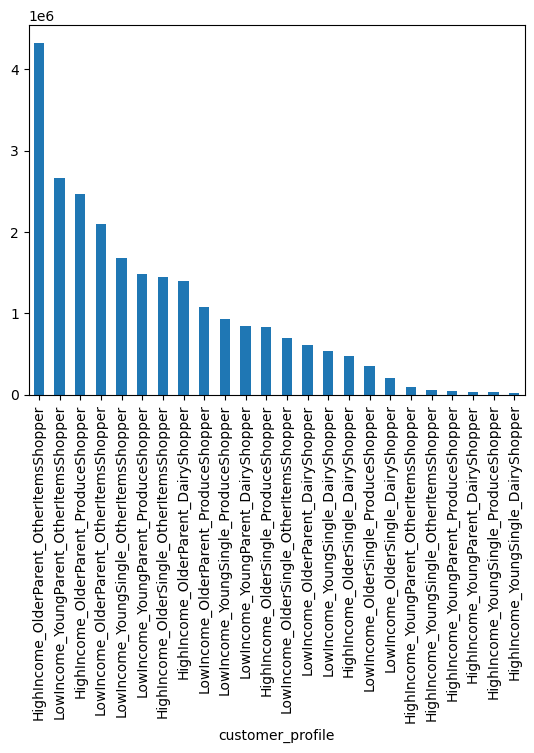

In [34]:
#6. Create an appropriate visualization to show the distribution of profiles.
cp_bar2=final_data2['customer_profile'].value_counts().plot.bar()

In [35]:
# Exporting the bar chart.
cp_bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile2.png'))

#7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [36]:
# Usage frequency
final_data2.groupby('customer_profile').agg({'order_number': ['max']})


,order_number
,max
customer_profile,
HighIncome_OlderParent_DairyShopper,99
HighIncome_OlderParent_OtherItemsShopper,99
HighIncome_OlderParent_ProduceShopper,99
HighIncome_OlderSingle_DairyShopper,99
HighIncome_OlderSingle_OtherItemsShopper,99
HighIncome_OlderSingle_ProduceShopper,99
HighIncome_YoungParent_DairyShopper,99
HighIncome_YoungParent_OtherItemsShopper,99


In [29]:
final_data2.groupby('customer_profile').agg({'order_number': ['mean']})


,order_number
,mean
customer_profile,
HighIncome_OlderParent_DairyShopper,22.286756
HighIncome_OlderParent_OtherItemsShopper,21.420773
HighIncome_OlderParent_ProduceShopper,22.525469
HighIncome_OlderSingle_DairyShopper,22.591951
HighIncome_OlderSingle_OtherItemsShopper,21.938913
HighIncome_OlderSingle_ProduceShopper,22.944524
HighIncome_YoungParent_DairyShopper,22.286109
HighIncome_YoungParent_OtherItemsShopper,21.261266


In [32]:
final_data2.groupby('customer_profile').agg({'order_number': ['min']})

,order_number
,min
customer_profile,
HighIncome_OlderParent_DairyShopper,5
HighIncome_OlderParent_OtherItemsShopper,5
HighIncome_OlderParent_ProduceShopper,5
HighIncome_OlderSingle_DairyShopper,5
HighIncome_OlderSingle_OtherItemsShopper,5
HighIncome_OlderSingle_ProduceShopper,5
HighIncome_YoungParent_DairyShopper,5
HighIncome_YoungParent_OtherItemsShopper,5


In [33]:
# Expenditure

final_data2.groupby('customer_profile').agg({'prices': ['max']})

,prices
,max
customer_profile,
HighIncome_OlderParent_DairyShopper,99999.0
HighIncome_OlderParent_OtherItemsShopper,25.0
HighIncome_OlderParent_ProduceShopper,15.0
HighIncome_OlderSingle_DairyShopper,99999.0
HighIncome_OlderSingle_OtherItemsShopper,25.0
HighIncome_OlderSingle_ProduceShopper,15.0
HighIncome_YoungParent_DairyShopper,99999.0
HighIncome_YoungParent_OtherItemsShopper,25.0


In [34]:
final_data2.groupby('customer_profile').agg({'prices': ['mean']})

,prices
,mean
customer_profile,
HighIncome_OlderParent_DairyShopper,39.598781
HighIncome_OlderParent_OtherItemsShopper,7.718018
HighIncome_OlderParent_ProduceShopper,8.069815
HighIncome_OlderSingle_DairyShopper,43.417405
HighIncome_OlderSingle_OtherItemsShopper,7.693355
HighIncome_OlderSingle_ProduceShopper,8.083943
HighIncome_YoungParent_DairyShopper,719.132703
HighIncome_YoungParent_OtherItemsShopper,7.663885


In [35]:
final_data2.groupby('customer_profile').agg({'prices': ['min']})

,prices
,min
customer_profile,
HighIncome_OlderParent_DairyShopper,1.0
HighIncome_OlderParent_OtherItemsShopper,1.0
HighIncome_OlderParent_ProduceShopper,1.0
HighIncome_OlderSingle_DairyShopper,1.0
HighIncome_OlderSingle_OtherItemsShopper,1.0
HighIncome_OlderSingle_ProduceShopper,1.0
HighIncome_YoungParent_DairyShopper,1.0
HighIncome_YoungParent_OtherItemsShopper,1.0


#8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may 
    demonstrate different behaviors across regions, which could make this information important.

In [36]:
final_data2.columns

Index(['user_id', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age',
       'date_joined', 'Num_Dependants', 'Marital_Status', 'income',
       'Unnamed: 0_x', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range',
       'busiest_day', 'Busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag', 'median_days_since',
       'order_frequency_flag', 'Region', 'South_Spending', 'West_Spending',
       'Midwest_Spending', 'Northeast_Spending', 'exclusion_flag',
       'customer_profile'],
      dtype='object')

In [43]:
cus_region2=final_data2[['customer_profile','Region']].value_counts()

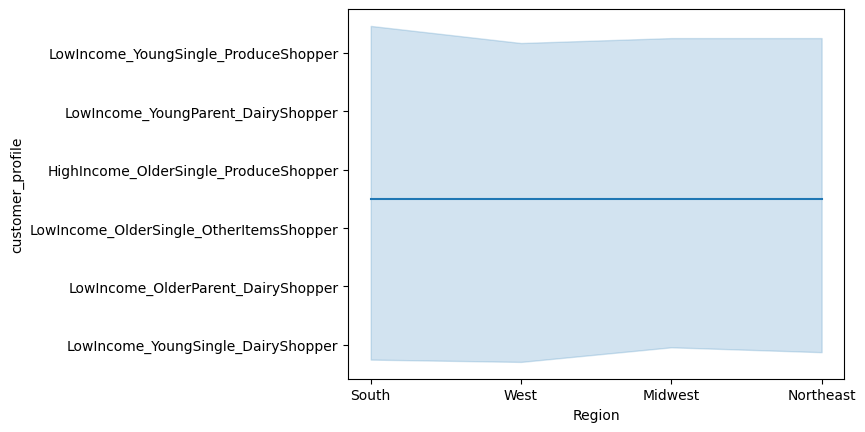

In [44]:
lineCR2 = sns.lineplot(data = cus_region2, x = 'Region',y = 'customer_profile')

In [45]:
# Exporting the line chart.
lineCR2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer_Region2.png'))

In [46]:
#Export 
cus_region2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'customer_region2.csv'))

In [47]:
cus_dept2=final_data2[['customer_profile','department_id']].value_counts()

[[<matplotlib.axis.XTick at 0x16186c950>,

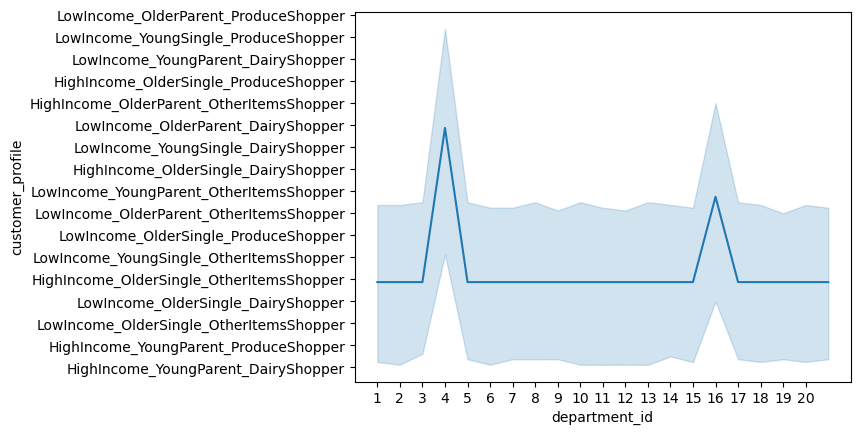

In [48]:
lineCD2 = sns.lineplot(data = cus_dept2, x = 'department_id',y = 'customer_profile')
lineCD2.set(xticks=list(range(1,21)))

In [49]:
# Exporting the line chart.
lineCD2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer_DeptID2.png'))

In [50]:
#Export 
cus_dept2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'customer_dept_id2.csv'))

In [37]:
cus_id_region2=final_data2[['customer_profile','department_id','Region']].value_counts()

In [38]:
#Export 
cus_id_region2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'customer_deptid_region2.csv'))

In [51]:

final_data2.groupby('customer_profile').agg({'department_id':['max','mean','min','count']})


department_id                        
                                                   max       mean min    count
customer_profile                                                              
HighIncome_OlderParent_DairyShopper                 16  16.000000  16  1403698
HighIncome_OlderParent_OtherItemsShopper            21  11.139047   1  4328386
HighIncome_OlderParent_ProduceShopper                4   4.000000   4  2469032
HighIncome_OlderSingle_DairyShopper                 16  16.000000  16   470169
HighIncome_OlderSingle_OtherItemsShopper            21  11.105177   1  1452956
HighIncome_OlderSingle_ProduceShopper                4   4.000000   4   835605
HighIncome_YoungParent_DairyShopper                 16  16.000000  16    29646
HighIncome_YoungParent_OtherItemsShopper            21  10.941766   1    94532
HighIncome_YoungParent_ProduceShopper                4   4.000000   4    43677
HighIncome_YoungSingle_DairyShopper                 16  16.000000  16    18565
HighIncome_YoungSingle_OtherItemsShopper            21  10.950731   1    59672
HighIncome_YoungSingle_ProduceShopper                4   4.000000   4    28972
LowIncome_OlderParent_DairyShopper                  16  16.000000  16   616457
LowIncome_OlderParent_OtherItemsShopper             21  11.588850   1  2101953
LowIncome_OlderParent_ProduceShopper                 4   4.000000   4  1073436
LowIncome_OlderSingle_DairyShopper                  16  16.000000  16   207905
LowIncome_OlderSingle_OtherItemsShopper             21  11.587694   1   694996
LowIncome_OlderSingle_ProduceShopper                 4   4.000000   4   355177
LowIncome_YoungParent_DairyShopper                  16  16.000000  16   848398
LowIncome_YoungParent_OtherItemsShopper             21  11.339035   1  2659337
LowIncome_YoungParent_ProduceShopper                 4   4.000000   4  1484359
LowIncome_YoungSingle_DairyShopper                  16  16.000000  16   537222
LowIncome_YoungSingle_OtherItemsShopper             21  11.312984   1  1684964
LowIncome_YoungSingle_ProduceShopper                 4   4.000000   4   936833

In [41]:
final_data2.groupby('department_id').agg({'add_to_cart_order':['sum']})

,add_to_cart_order
,sum
department_id,
1,14682129
2,226181
3,7166915
4,58260168
5,590956
6,1976503
7,14263730
8,556724


In [46]:
pop_prod=final_data2.groupby('product_name').agg({'add_to_cart_order':['sum']})

In [54]:
pop_prod.sort_values(by=[('add_to_cart_order','sum')],ascending=False)

,add_to_cart_order
,sum
product_name,
Banana,1759888
Bag of Organic Bananas,1546437
Organic Strawberries,1487936
Organic Baby Spinach,1385949
Organic Hass Avocado,1161418
...,...
Mighty Greens,1
Pappardelle Nests Pasta,1


In [68]:

final_data2['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    12755279
Loyal customer       9564122
New customer         2116546
Name: count, dtype: int64

In [70]:
final_data2.groupby('loyalty_flag').agg({'days_since_prior_order':['mean']})

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,5.954544
New customer,17.708819
Regular customer,11.917593


In [73]:
final_data2.groupby('loyalty_flag').agg('spending_flag').value_counts()

loyalty_flag      spending_flag
Loyal customer    Low spender       9361966
                  High spender       202156
New customer      Low spender       2080181
                  High spender        36365
Regular customer  Low spender      12510276
                  High spender       245003
Name: count, dtype: int64

In [74]:
final_data2.groupby('Region').agg('spending_flag').value_counts()

Region     spending_flag
Midwest    Low spender      5138178
           High spender      106701
Northeast  Low spender      4236668
           High spender       82662
South      Low spender      7976493
           High spender      159558
West       Low spender      6142242
           High spender      122002
Name: count, dtype: int64

In [78]:
AgeFamily_Spending=final_data2.groupby(['Age','Num_Dependants','Marital_Status']).agg('spending_flag').value_counts()

In [79]:
#Export the newly created dataframe 
AgeFamily_Spending.to_csv(os.path.join(path, '02 Data','Prepared Data', 'AgeFamily_SpendingHabits.csv'))